In [1]:
import datajoint as dj

In [2]:
import ephys
import matplotlib.pyplot as plt
%matplotlib inline

Connecting daveliu@mesoscale-activity.datajoint.io:3306


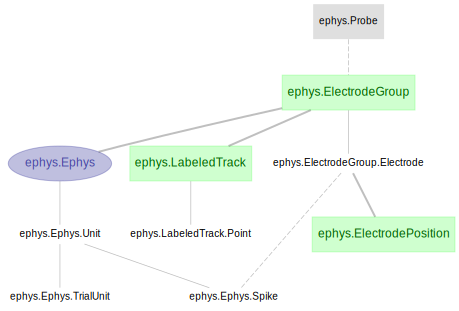

In [3]:
dj.ERD(ephys)

In [4]:
mouse=ephys.experiment.lab.Animal()
#mouse.insert1((400483,'2017-08-01'))

In [5]:
person=ephys.experiment.lab.Person()
#person.insert1(('daveliu', 'Dave Liu'))
person

username,fullname
daveliu,Dave Liu


In [6]:
rig=ephys.experiment.lab.Rig()
#rig.insert1(('TRig2', 'Training rig 2'))
rig

rig,rig_description
RRig,Recording Rig
TRig1,Training rig 1
TRig2,Training rig 2


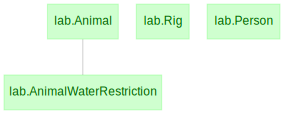

In [7]:
import lab
dj.ERD(lab)

In [8]:
animalWaterRestriction=ephys.experiment.lab.AnimalWaterRestriction()
#animalWaterRestriction.insert1((123456, 'tw5'))
animalWaterRestriction

animal Janelia ANM ID (6 digits),water_restriction water restriction number
123456,tw5
399752,dl7
400483,dl8


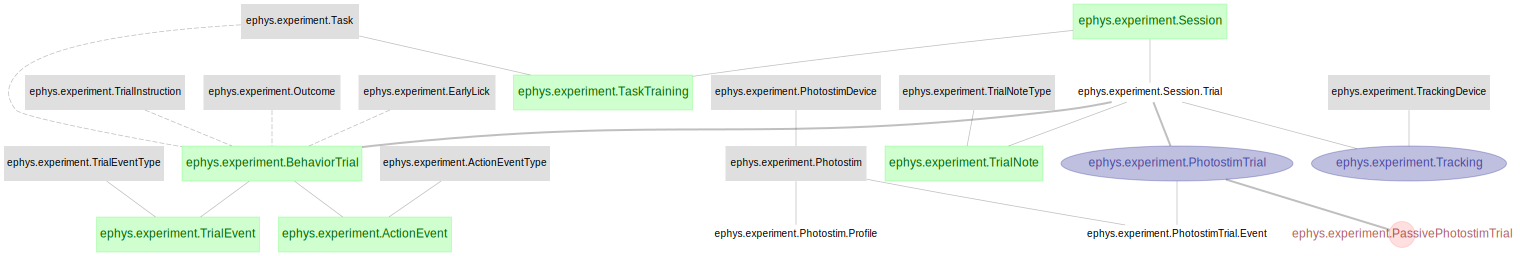

In [9]:
dj.ERD(ephys.experiment)

In [10]:
import ingest
importedSessionFile=ingest.ImportedSessionFile()
importedSessionFileIngest = ingest.ImportedSessionFileIngest()

In [11]:
#importedSessionFile
#importedSessionFile.drop()
importedSessionFileIngest.populate()

In [12]:
importedSessionFile.drop()

`daveliu_ingest`.`#imported_session_file` (1 tuples)
`daveliu_ingest`.`_imported_session_file_ingest` (1 tuples)
Proceed? [yes, No]: No


In [13]:
importedSessionFileIngest

imported_session_file imported session file,animal Janelia ANM ID (6 digits),session session number
tw5_TW_autoTrain_20171021_150914.mat,123456,53


In [14]:
session=ephys.experiment.Session()
session

animal Janelia ANM ID (6 digits),session session number,session_date,username,rig,behavior_file the behavior file name
123456,53,2017-10-21,daveliu,RRig,tw5_TW_autoTrain_20171021_150914.mat
399752,1,2017-11-14,daveliu,TRig1,dl7_TW_autoTrain_20171114_144434.mat
399752,2,2017-11-16,daveliu,TRig1,dl7_TW_autoTrain_20171116_123237.mat
399752,3,2017-11-18,daveliu,TRig1,dl7_TW_autoTrain_20171118_141139.mat
399752,4,2017-11-19,daveliu,TRig1,dl7_TW_autoTrain_20171119_122727.mat
399752,5,2017-11-19,daveliu,TRig1,dl7_TW_autoTrain_20171119_130846.mat
399752,6,2017-11-20,daveliu,TRig1,dl7_TW_autoTrain_20171120_132218.mat


In [15]:
trialNote = ephys.experiment.TrialNote()

In [16]:
import numpy as np

In [17]:
behaviorTrial = ephys.experiment.BehaviorTrial()

In [26]:
outcome = (behaviorTrial & 'animal = 123456').fetch('outcome', order_by='session')
early_lick = (behaviorTrial & 'animal = 123456').fetch('early_lick', order_by='session')

In [27]:
data = np.zeros(len(outcome))
data1 = np.zeros(len(early_lick))
data2 = np.zeros(len(outcome))

In [28]:
data[outcome=='hit'] = 1
data1[early_lick=='early'] = 1
data2[outcome=='ignore'] = 1

In [31]:
trial_note = (trialNote & 'animal = 123456').fetch('trial_note', order_by='session')
results = list(map(int, trial_note))
protDiff = np.diff(results)
protChange = np.where(protDiff != 0)

In [32]:
def movingaverage (values, window):
    weights = np.repeat(1.0, window)/window
    sma = np.convolve(values, weights, 'valid')
    return sma

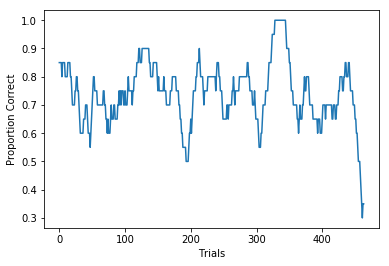

In [33]:
yMA = movingaverage(data,20)
plt.plot(yMA)
plt.xlabel('Trials')
plt.ylabel('Proportion Correct')
for i in range(0, len(protChange[0])):
    plt.axvline(protChange[0][i], linewidth=4, color='r')
plt.savefig('dl8Training.png')

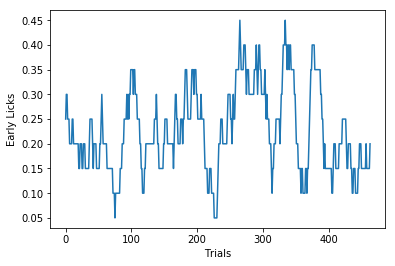

In [34]:
yMA = movingaverage(data1,20)
plt.plot(yMA)
plt.xlabel('Trials')
plt.ylabel('Early Licks')
for i in range(0, len(protChange[0])):
    plt.axvline(protChange[0][i], linewidth=4, color='r')
plt.savefig('dl8Training2.png')

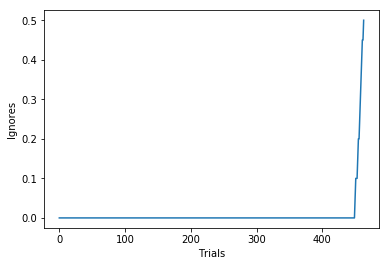

In [35]:
yMA = movingaverage(data2,20)
plt.plot(yMA)
plt.xlabel('Trials')
plt.ylabel('Ignores')
for i in range(0, len(protChange[0])):
    plt.axvline(protChange[0][i], linewidth=4, color='r')
plt.savefig('dl8Training3.png')

In [37]:
len(outcome)

483